In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/SENSEX_02062025_18092025.csv")


correlation_matrix = df[["SENSEX_CL_OP_SPREAD","INFY_CL_OP_SPREAD"]].corr()
print(correlation_matrix)

                     SENSEX_CL_OP_SPREAD  INFY_CL_OP_SPREAD
SENSEX_CL_OP_SPREAD             1.000000           0.139899
INFY_CL_OP_SPREAD               0.139899           1.000000


In [5]:
df.head()

,Date,Open,High,Low,Close,SENSEX_CL_OP_SPREAD,INFY_CL_OP_SPREAD,logvalue
0,18-Sep-25,83108.92,83141.21,82704.92,83013.96,-94.96,-0.82,0.086186
1,17-Sep-25,82506.40,82741.95,82490.47,82693.71,187.31,-0.88,0.055517
2,16-Sep-25,81852.11,82443.48,81779.94,82380.69,528.58,-1.09,-0.037426
3,15-Sep-25,81925.51,81998.51,81744.70,81785.74,-139.77,0.97,-0.013228
4,12-Sep-25,81758.95,81992.85,81641.38,81904.70,145.75,-2.59,-0.413300


In [ ]:
df.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
SENSEX_CL_OP_SPREAD    0
INFY_CL_OP_SPREAD      0
logvalue               0
dtype: int64

In [ ]:
df.describe()

,Open,High,Low,Close,SENSEX_CL_OP_SPREAD,INFY_CL_OP_SPREAD,logvalue
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,81785.112987,82081.792597,81464.467273,81763.739740,-21.373247,-0.327013,-0.043236
std,1058.226240,1005.230809,1057.155149,1048.766776,422.468674,1.516045,0.528851
min,79828.990000,80310.740000,79741.760000,79809.650000,-879.690000,-6.420000,-1.698970
25%,81012.420000,81317.510000,80608.940000,80891.020000,-320.290000,-0.930000,-0.267172
50%,81594.520000,81985.620000,81323.200000,81644.390000,-42.040000,-0.300000,0.031517
75%,82534.660000,82757.090000,82240.400000,82445.210000,271.720000,0.560000,0.259637
max,84027.330000,84099.530000,83645.410000,84058.900000,1053.320000,2.710000,1.000000


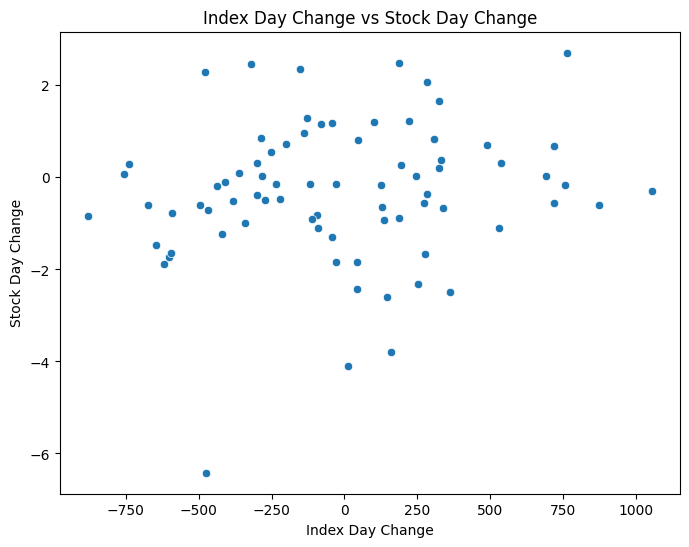

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SENSEX_CL_OP_SPREAD', y='INFY_CL_OP_SPREAD')
plt.title('Index Day Change vs Stock Day Change')
plt.xlabel('Index Day Change')
plt.ylabel('Stock Day Change')
plt.show()

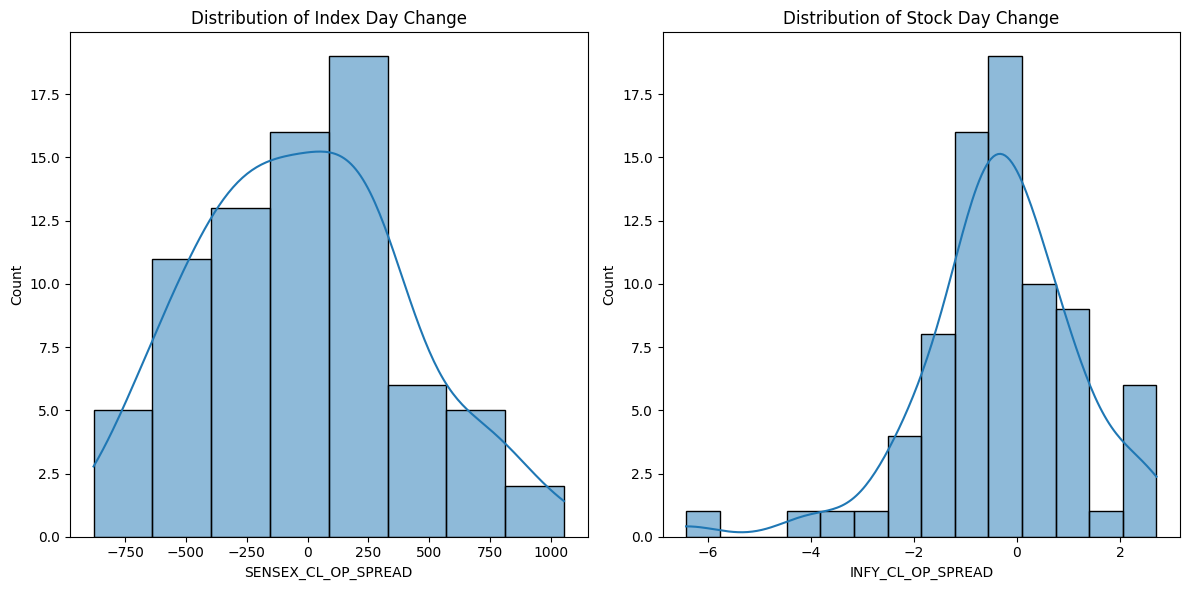

In [ ]:
plt.figure(figsize=(12, 6))

# Distribution of index day change
plt.subplot(1, 2, 1)
sns.histplot(df['SENSEX_CL_OP_SPREAD'], kde=True)
plt.title('Distribution of Index Day Change')

# Distribution of stock day change
plt.subplot(1, 2, 2)
sns.histplot(df['INFY_CL_OP_SPREAD'], kde=True)
plt.title('Distribution of Stock Day Change')

plt.tight_layout()
plt.show()

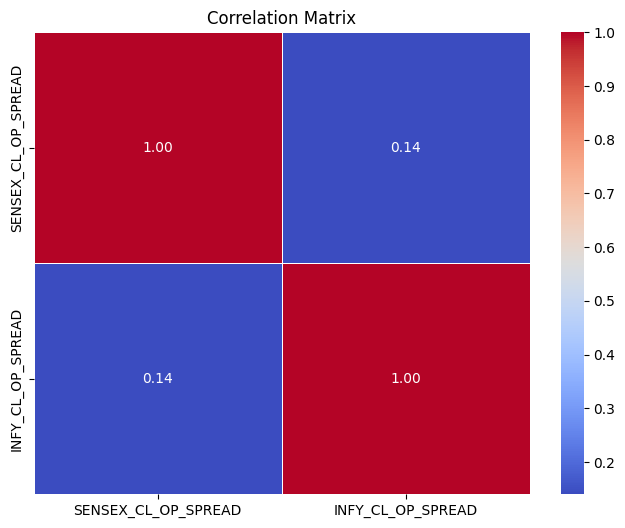

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['index_day_change_lag1'] = df['SENSEX_CL_OP_SPREAD'].shift(1)
df['stock_day_change_lag1'] = df['INFY_CL_OP_SPREAD'].shift(1)
print(df)

         Date      Open      High       Low     Close  SENSEX_CL_OP_SPREAD  \
0   18-Sep-25  83108.92  83141.21  82704.92  83013.96               -94.96   
1   17-Sep-25  82506.40  82741.95  82490.47  82693.71               187.31   
2   16-Sep-25  81852.11  82443.48  81779.94  82380.69               528.58   
3   15-Sep-25  81925.51  81998.51  81744.70  81785.74              -139.77   
4   12-Sep-25  81758.95  81992.85  81641.38  81904.70               145.75   
..        ...       ...       ...       ...       ...                  ...   
72  06-Jun-25  81434.24  82299.89  81140.11  82188.99               754.75   
73  05-Jun-25  81196.08  81911.13  80983.73  81442.04               245.96   
74  04-Jun-25  80777.65  81087.29  80705.18  80998.25               220.60   
75  03-Jun-25  81492.50  81774.23  80575.09  80737.51              -754.99   
76  02-Jun-25  81214.42  81474.26  80654.26  81373.75               159.33   

    INFY_CL_OP_SPREAD  logvalue  index_day_change_lag1  stock_d

In [ ]:
# Drop NaN rows created by the lag shift
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,SENSEX_CL_OP_SPREAD,INFY_CL_OP_SPREAD,logvalue,index_day_change_lag1,stock_day_change_lag1
1,17-Sep-25,82506.40,82741.95,82490.47,82693.71,187.31,-0.88,0.055517,-94.96,-0.82
2,16-Sep-25,81852.11,82443.48,81779.94,82380.69,528.58,-1.09,-0.037426,187.31,-0.88
3,15-Sep-25,81925.51,81998.51,81744.70,81785.74,-139.77,0.97,-0.013228,528.58,-1.09
4,12-Sep-25,81758.95,81992.85,81641.38,81904.70,145.75,-2.59,-0.413300,-139.77,0.97
5,11-Sep-25,81217.30,81642.22,81216.91,81548.73,331.43,0.38,-0.420216,145.75,-2.59


In [ ]:
df['index_rolling_mean'] = df['SENSEX_CL_OP_SPREAD'].rolling(window=5).mean()
df['stock_rolling_mean'] = df['INFY_CL_OP_SPREAD'].rolling(window=5).mean()
df = df.dropna()  # Drop any rows with NaN from rolling mean
df.head()

,Date,Open,High,Low,Close,SENSEX_CL_OP_SPREAD,INFY_CL_OP_SPREAD,logvalue,index_day_change_lag1,stock_day_change_lag1,index_rolling_mean,stock_rolling_mean
5,11-Sep-25,81217.30,81642.22,81216.91,81548.73,331.43,0.38,-0.420216,145.75,-2.59,210.660,-0.642
6,10-Sep-25,81504.36,81643.88,81235.42,81425.15,-79.21,1.16,0.064458,331.43,0.38,157.356,-0.234
7,09-Sep-25,81129.69,81181.37,80927.97,81101.32,-28.37,-0.14,0.853872,-79.21,1.16,45.966,-0.044
8,08-Sep-25,80904.40,81171.38,80733.07,80787.30,-117.10,-0.14,0.853872,-28.37,-0.14,50.500,-0.266
9,05-Sep-25,81012.42,81036.56,80321.19,80710.76,-301.66,-0.38,0.420216,-117.10,-0.14,-38.982,0.176


In [ ]:
df['index_stock_interaction'] = df['SENSEX_CL_OP_SPREAD'] * df['INFY_CL_OP_SPREAD']
df.head()


C:\Users\M339572\AppData\Local\Temp\ipykernel_4908\1712562075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index_stock_interaction'] = df['SENSEX_CL_OP_SPREAD'] * df['INFY_CL_OP_SPREAD']


,Date,Open,High,Low,Close,SENSEX_CL_OP_SPREAD,INFY_CL_OP_SPREAD,logvalue,index_day_change_lag1,stock_day_change_lag1,index_rolling_mean,stock_rolling_mean,index_stock_interaction
5,11-Sep-25,81217.30,81642.22,81216.91,81548.73,331.43,0.38,-0.420216,145.75,-2.59,210.660,-0.642,125.9434
6,10-Sep-25,81504.36,81643.88,81235.42,81425.15,-79.21,1.16,0.064458,331.43,0.38,157.356,-0.234,-91.8836
7,09-Sep-25,81129.69,81181.37,80927.97,81101.32,-28.37,-0.14,0.853872,-79.21,1.16,45.966,-0.044,3.9718
8,08-Sep-25,80904.40,81171.38,80733.07,80787.30,-117.10,-0.14,0.853872,-28.37,-0.14,50.500,-0.266,16.3940
9,05-Sep-25,81012.42,81036.56,80321.19,80710.76,-301.66,-0.38,0.420216,-117.10,-0.14,-38.982,0.176,114.6308


In [ ]:
from sklearn.model_selection import train_test_split

# Define the features and target
X = df[['SENSEX_CL_OP_SPREAD', 'index_day_change_lag1', 'index_stock_interaction']]  # Independent variables
y = df['INFY_CL_OP_SPREAD']  # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 1.5979
R-squared: -0.0247


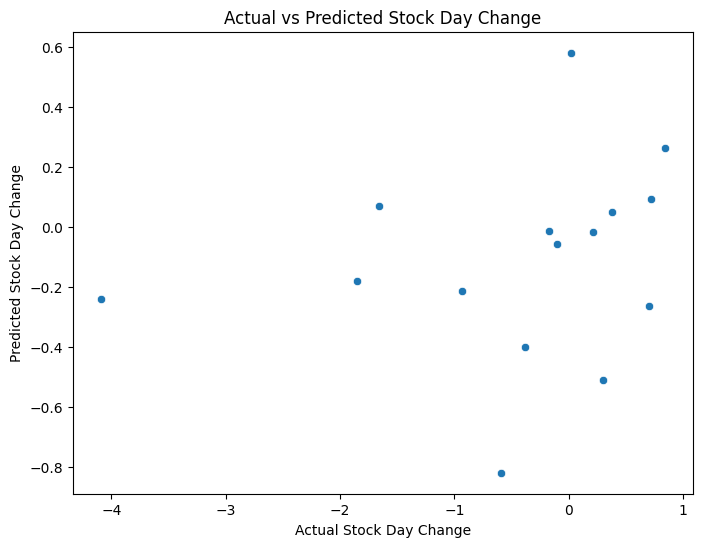

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Stock Day Change')
plt.xlabel('Actual Stock Day Change')
plt.ylabel('Predicted Stock Day Change')
plt.show()